    ПРИМЕР 1.1.1 
    
Задача: Рассмотрим программу обучения персептрона на языке Python. Сначала рассмотрим основной класс персептрона, который умеет учиться по тестовым данным.


In [2]:
#бинарная классификация

# класс, который реализует перспептрон и его обучение
class Perceptron:
    def __init__(self,N):
        # создать нулевые веса
        self.w = list()
        for i in range(N):
            self.w.append( 0)

    #метод для вычисления значения перспептрона
    def calc(self,x):
        res = 0
        for i in range(len(self.w)):
            res = res + self.w[i] * x[i]
        return res
    
    # пороговая функция активации перспептрона (Проверка)
    def sign(self,x):
        if self.calc(x) > 0:
            return 1
        else:
            return -1
        
    # обучение на одном примере
    def learn(self, la, x, y):
        #обучаем только, когда результат неверный
        if y * self.calc(x) <= 0:
            for i in range(len(self.w)):
                self.w[i] = self.w[i] + la * y * x[i]

    #обучение по всем данным Т - кортеж примеров
    def learning(self, la, T):
        #цикл обучения
        for n in range(100):
            #обучение по всем набору примеров
            for t in T:
                self.learn(la,t[0], t[1])

#В строке 25 мы осуществляем корректировку весов. Посмотрим, как учится
# и работает наш персептрон.
#создаем класс двумерного перспетрона

perceptron = Perceptron(2)
la = 0.1 #
#создаём примеры

T = list()
T.append([[2,1],1])
T.append([[3,2],1])
T.append([[4,1],1])
T.append([[1,2],-1])
T.append([[2,3],-1])
T.append([[5,7],-1])
perceptron.learning(la,T)# обучение перспетрона
print(perceptron.w)# печатаем веса
# проверим работу на тестовых примерах
print(perceptron.sign([1.5, 2]))
print(perceptron.sign([3, 1.5]))
print(perceptron.sign([5, 1]))
print(perceptron.sign([5, 10]))

[0.1, -0.1]
-1
1
1
-1


    ПРИМЕР 1.1.2 
    
Решение: Для написания кода нейрона будем использовать библиотеку Pytnon — NumPy:

In [3]:
import numpy as np

#принимает на вход число и преобразует в диапозоне между 0 и 1(активируе нейрон или нет)
#инимы словами нормализует данные 
def sigmoid(x):
    # Функция активации: f(x) = 1 / (1 + e*(-x))
    return 1 / (1 + np.exp(-x))


class Neuron:
    def __init__(self, weights, bias):
        self.weights = weights # параметр , используемый для вычисления выхода
        #самый высокий вес из всех нейронов идет дальше(доминирующая)
        self.bias = bias #параметр смещения 

    #шаг нейрона 
    def feedforward(self, inputs):
        total = np.dot(self.weights, inputs) + self.bias
        return sigmoid(total)

weights = np.array([0, 1]) 
bias = 4 
n = Neuron(weights, bias)
x = np.array([2, 3]) 
print(n.feedforward(x)) 

0.9990889488055994


Нейросеть состоит из множества соединенных между собой нейронов. Пример несложной нейронной сети

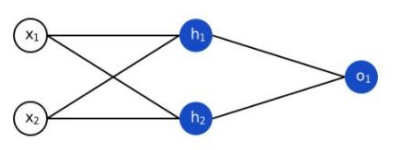

 где: 𝑥1, 𝑥2 — входной слой; ℎ1, ℎ2 — скрытый слой с двумя нейронами; 𝑜1 — выходной слой. Например. Представим, что нейроны из графика выше имеют веса [0, 1]. Пороговое значение (𝑏) у обоих нейронов равно 0 и они имеют идентичную сигмоиду. При входных данных 𝑥 = [2, 3] получим: ℎ1 = ℎ2 = 𝑓(𝑤𝑥 + 𝑏) = 𝑓((02) + (1 ∗ 3) + 0) = 𝑓(3) = 0.95. 𝑜1 = 𝑓(𝑤 ∗ [ℎ1, ℎ2] + 𝑏) = 𝑓((0ℎ1) + (1ℎ2) + 0) = 𝑓(0.95) = 0.72. Входные данные по нейронам передаются до тех пор, пока не получатся выходные значения.

In [4]:
import numpy as np


#Нейроная сеть 
class OurNeuralNetwork:
    def __init__(self):
        weights = np.array([0, 1])
        bias = 0
        self.h1 = Neuron(weights, bias)
        self.h2 = Neuron(weights, bias)
        self.o1 = Neuron(weights, bias)
    #Шаг нейроной сети 
    def feedforward(self, x):
        out_h1 = self.h1.feedforward(x)
        out_h2 = self.h2.feedforward(x)
        # Bxodu Ona 01 — 3mo Gaxody h1 u h2
        out_o1 = self.o1.feedforward(np.array([out_h1, out_h2]))
        return out_o1

network = OurNeuralNetwork()
x = np.array([2, 3])
print(network.feedforward(x)) # 0.7216325609518421

0.7216325609518421


    Задание 1

Реализовать классы нейросетей по аналогии с классом OurNeuralNetwork.

Данные 1 нейросети:
+ три входа (𝑥1, 𝑥2, 𝑥3);
+ три нейрона в скрытых слоях (ℎ1, ℎ2, ℎ3);
+ выход (𝑜1).

    Нейроны имеют идентичные веса и пороги:

+ 𝑤 = [0.5, 0.5, 0.5]
+ 𝑏 = 0

Данные 2 нейросети:
+ два входа (𝑥1, 𝑥2);
+ два нейрона в скрытых слоях (ℎ1, ℎ2);

+ два выхода (𝑜1, 𝑜2).
    Нейроны имеют идентичные веса и пороги:

+ 𝑤 = [1, 0];
+ 𝑏 = 1.

    Реализуйте классы нейронных сетей с использованием других функций
активации
1) sigmoid
2) tanh
3) ReLU

- SIGMOID [0,1]  (если нету отрицательных значений)

In [5]:
import numpy as np

#Активация сигмоидом , на вход x вычисление 
def sigmoid(x):
    z = np.exp(-x)
    sig = 1 / (1 + z)
    return sig

class Neuron1:
    #конструктор класса, принимающий на вход веса и смещения
    def __init__(self, weights, bias):
        self.weights = weights
        self.bias = bias
    # feedford возвращает результат активации сигмоидом
    def feedforward (self, inputs):
        total = np.dot(self.weights, inputs) + self.bias
        return sigmoid(total)

class OurNeuralNetwork1: #первая нейросеть 
    
    #параметры НС
    def __init__(self):
        weights = np.array([0.5, 0.5, 0.5])
        bias = 0
        self.h1 = Neuron1(weights, bias)
        self.h2 = Neuron1(weights, bias)
        self.h3 = Neuron1(weights, bias)
        self.o1 = Neuron1(weights, bias)

    #результат выходного нейрона
    def feedforward(self, x):
        out_h1 = self.h1.feedforward(x)
        out_h2 = self.h2.feedforward(x)
        out_h3 = self.h3.feedforward(x)
        out_o1 = self.o1.feedforward(np.array([out_h1, out_h2, out_h3]))
        return out_o1

class OurNeuralNetwork2: #вторая нейросеть

    #параметры НС
    def __init__(self):
        weights = np.array([1,0])
        bias = 1

        self.h1 = Neuron1(weights, bias)
        self.h2 = Neuron1(weights, bias)
        self.o1 = Neuron1(weights, bias)
        self.o2 = Neuron1(weights, bias)
    
    #результаты выходных нейронов
    def feedforward(self, x):
        out_h1 = self.h1.feedforward(x)
        out_h2 = self.h2.feedforward(x)
        out_o1 = self.o1.feedforward(np.array([out_h1, out_h2]))
        out_o2 = self.o2.feedforward(np.array([out_h1, out_h2]))
        return out_o1, out_o2

#создание НС 1
network = OurNeuralNetwork1()
#подача данных
x = np.array ([2, 3, 4])
print (network.feedforward(x))

#создание НС 2
network = OurNeuralNetwork2()
#подача данных
x = np.array ([2, 3])
print (network.feedforward(x))

0.8151036049051821
(0.8757270529783324, 0.8757270529783324)


- TANH [если "-" ближе к -1; если  "+" ближе к +1] (Есть смысл если есть отрицательные значения )

In [6]:
def tanh(x):
    return np.tan(x)

class Neuron2:
    def __init__(self, weights, bias):
        self.weights = weights
        self.bias = bias
    def feedforward (self, inputs):
        total = np.dot(self.weights, inputs) + self.bias
        return tanh(total)

class OurNeuralNetwork1:
    def __init__(self):
        weights = np.array([0.5, 0.5, 0.5])
        bias = 0 
        self.h1 = Neuron2(weights, bias)
        self.h2 = Neuron2(weights, bias)
        self.h3 = Neuron2(weights, bias)
        self.o1 = Neuron2(weights, bias)
    def feedforward(self, x):
        out_h1 = self.h1.feedforward(x)
        out_h2 = self.h2.feedforward(x)
        out_h3 = self.h3.feedforward(x)
        out_o1 = self.o1.feedforward(np.array([out_h1, out_h2, out_h3]))
        return out_o1

class OurNeuralNetwork2:
    def __init__(self):
        weights = np.array([1,0])
        bias = 1
        
        self.h1 = Neuron2(weights, bias)
        self.h2 = Neuron2(weights, bias)
        self.o1 = Neuron2(weights, bias)
        self.o2 = Neuron2(weights, bias)
    def feedforward(self, x):
        out_h1 = self.h1.feedforward(x)
        out_h2 = self.h2.feedforward(x)
        out_o1 = self.o1.feedforward(np.array([out_h1, out_h2]))
        out_o2 = self.o2.feedforward(np.array([out_h1, out_h2]))
        return out_o1, out_o2


network = OurNeuralNetwork1()
x = np.array ([2, 3, 4])
print (network.feedforward(x))

network = OurNeuralNetwork2()
x = np.array ([2, 3])
print (network.feedforward(x))

0.7968426715486405
(1.1555911185916798, 1.1555911185916798)


- RELU [0 если число "-"; само значение если "+"]

In [7]:
def ReLU(x):
    return np.maximum(0, x)

class Neuron3:
    def __init__(self, weights, bias):
        self.weights = weights
        self.bias = bias
    def feedforward (self, inputs):
        total = np.dot(self.weights, inputs) + self.bias
        return ReLU(total)

class OurNeuralNetwork1:
    def __init__(self):
        weights = np.array([0.5, 0.5, 0.5])
        bias = 0 
        self.h1 = Neuron3(weights, bias)
        self.h2 = Neuron3(weights, bias)
        self.h3 = Neuron3(weights, bias)
        self.o1 = Neuron3(weights, bias)
    def feedforward(self, x):
        out_h1 = self.h1.feedforward(x)
        out_h2 = self.h2.feedforward(x)
        out_h3 = self.h3.feedforward(x)
        out_o1 = self.o1.feedforward(np.array([out_h1, out_h2, out_h3]))
        return out_o1
    

class OurNeuralNetwork2:
    def __init__(self):
        weights = np.array([1,0])
        bias = 1
        
        self.h1 = Neuron3(weights, bias)
        self.h2 = Neuron3(weights, bias)
        self.o1 = Neuron3(weights, bias)
        self.o2 = Neuron3(weights, bias)
    def feedforward(self, x):
        out_h1 = self.h1.feedforward(x)
        out_h2 = self.h2.feedforward(x)
        out_o1 = self.o1.feedforward(np.array([out_h1, out_h2]))
        out_o2 = self.o2.feedforward(np.array([out_h1, out_h2]))
        return out_o1, out_o2
    

network = OurNeuralNetwork1()
x = np.array ([2, 3, 4])
print (network.feedforward(x))

network = OurNeuralNetwork2()
x = np.array ([2, 3])
print (network.feedforward(x))

6.75
(4, 4)


3 задание 
Используйте классы MLPClassified и MLPRegressor для классификации и
регрессии произвольных данных из интернета. Проведите анализ
атрибуты, полученных моделей.
Для классификации можете взять набор данных Ирисов:
https://gist.githubusercontent.com/netj/8836201/raw/6f9306ad21398ea43cba4f
7d537619d0e07d5ae3/iris.csv
а для регрессии датасет зависимости заработной платы от опыта работы:
https://raw.githubusercontent.com/AnnaShestova/salary-years-simple-linearregression/master/Salary_Data.csv

+ Классификатор 


In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPClassifier
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

url = "https://gist.githubusercontent.com/netj/8836201/raw/6f9306ad21398ea43cba4f7d537619d0e07d5ae3/iris.csv"
df = pd.read_csv(url)
df.head(5)
df

sepal.length  sepal.width  petal.length  petal.width    variety
0             5.1          3.5           1.4          0.2     Setosa
1             4.9          3.0           1.4          0.2     Setosa
2             4.7          3.2           1.3          0.2     Setosa
3             4.6          3.1           1.5          0.2     Setosa
4             5.0          3.6           1.4          0.2     Setosa
..            ...          ...           ...          ...        ...
145           6.7          3.0           5.2          2.3  Virginica
146           6.3          2.5           5.0          1.9  Virginica
147           6.5          3.0           5.2          2.0  Virginica
148           6.2          3.4           5.4          2.3  Virginica
149           5.9          3.0           5.1          1.8  Virginica

[150 rows x 5 columns]

In [9]:
df = df.rename(columns={'variety': 'target'})
X_df, Y_df = df.drop(['target'], axis=1), df.target
print('Dataset Size: ', X_df.shape, Y_df.shape)

Dataset Size:  (150, 4) (150,)


In [10]:
X_train, X_test, Y_train, Y_test = train_test_split(X_df, Y_df, train_size=0.80, test_size=0.20, stratify=Y_df,
                                                    random_state=123)
print('Train/Test Sizes : ',X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)


Train/Test Sizes :  (120, 4) (30, 4) (120,) (30,)


In [11]:
from sklearn.neural_network import MLPClassifier

mlp_classifier = MLPClassifier(random_state=123 , max_iter= 1000)
mlp_classifier.fit(X_train, Y_train)

MLPClassifier(max_iter=1000, random_state=123)

[[10  0  0]
 [ 0  8  2]
 [ 0  0 10]]
Loss:  0.06237838693566958
Number of Coefs:  2
Number of Intercepts:  2
Number of Iteration for Which Estimator Ran:  641
Name of Output Layer Activation Function:  softmax


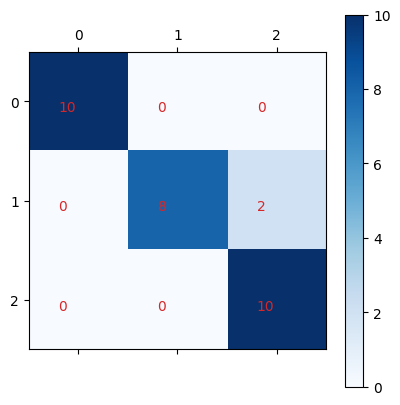

In [12]:
from sklearn.metrics import confusion_matrix

#матрциа путаницы
def plot_confusion_matrix(Y_test, Y_preds):
    conf_mat = confusion_matrix(Y_test, Y_preds)
    print(conf_mat)
    plt.matshow(conf_mat, cmap = plt.cm.Blues, fignum = 1)
    plt.yticks(range(3), range(3))
    plt.xticks(range(3), range (3))
    plt.colorbar()
    for i in range(3):
        for j in range(3):
            plt.text(i-0.2,j+0.1, str(conf_mat[j,i]), color = 'tab:red')

plot_confusion_matrix(Y_test,mlp_classifier.predict(X_test))

print('Loss: ', mlp_classifier.loss_)
print('Number of Coefs: ', len(mlp_classifier.coefs_))
print('Number of Intercepts: ', len(mlp_classifier.intercepts_))
print('Number of Iteration for Which Estimator Ran: ', mlp_classifier.n_iter_)
print('Name of Output Layer Activation Function: ', mlp_classifier.out_activation_)

+ Регрессор 

In [13]:
url = 'https://raw.githubusercontent.com/AnnaShestova/salary-years-simple-linear-regression/master/Salary_Data.csv'
df = pd.read_csv(url)
df.head(5)

YearsExperience   Salary
0              1.1  39343.0
1              1.3  46205.0
2              1.5  37731.0
3              2.0  43525.0
4              2.2  39891.0

In [14]:
df = df.rename(columns = {'Salary':'target'})
X_df, Y_df = df.drop(['target'], axis = 1), df.target
print ('Dataset size: ', X_df.shape, Y_df.shape)

Dataset size:  (30, 1) (30,)


In [15]:
X_train, X_test, Y_train, Y_test = train_test_split(X_df, Y_df, train_size = 0.80, test_size = 0.20, random_state = 123)
print ('Train/Test size: ', X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)

Train/Test size:  (24, 1) (6, 1) (24,) (6,)


In [16]:
mlp_regressor = MLPRegressor(random_state=123, max_iter=35000)
mlp_regressor.fit(X_train, Y_train)

MLPRegressor(max_iter=35000, random_state=123)

In [17]:
Y_preds = mlp_regressor.predict(X_test)

print (Y_preds[:10])
print (Y_test[:10])
print ('Test R^2 Score: %.3f'%mlp_regressor.score(X_test, Y_test))
print ('Training R^2 Score: %.3f'%mlp_regressor.score(X_train, Y_train))

[ 55265.2045971  126554.5591937   52335.80522199 116782.59147446
  55265.2045971  117759.05793283]
7      54445.0
29    121872.0
5      56642.0
26    116969.0
8      64445.0
27    112635.0
Name: target, dtype: float64
Test R^2 Score: 0.971
Training R^2 Score: 0.948


In [18]:
print ('Loss: ', mlp_regressor.loss_)
print ('Number of Coefs: ', len(mlp_regressor.coefs_))
print ('Number of Intercepts: ', len(mlp_regressor.intercepts_))
print ('Number of Iteration for Which Estimator Ran: ', mlp_regressor.n_iter_)
print ('Name of Output Layer Activation Function: ', mlp_regressor.out_activation_)

Loss:  16873681.689960103
Number of Coefs:  2
Number of Intercepts:  2
Number of Iteration for Which Estimator Ran:  30344
Name of Output Layer Activation Function:  identity
